In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./hurto.csv", sep = ';')

In [17]:
df_copy = df.copy()

In [18]:
df_2017_2022 = df_copy[df_copy["Fecha_hecho"] >= 2017].reset_index()

In [19]:
df_2017_2022

,index,Fecha_hecho,Conducta,Codigo_comuna,Cantidad_casos
0,205,2017,Extorsión,1,6
1,206,2017,Extorsión,10,77
2,207,2017,Extorsión,11,41
3,208,2017,Extorsión,12,24
4,209,2017,Extorsión,13,35
...,...,...,...,...,...
776,2436,2021,Hurto de semoviente,60,2
777,2437,2021,Hurto de semoviente,80,2
778,2438,2022,Hurto de semoviente,50,1
779,2439,2022,Hurto de semoviente,60,1


In [20]:
df_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           781 non-null    int64 
 1   Fecha_hecho     781 non-null    int64 
 2   Conducta        781 non-null    object
 3   Codigo_comuna   781 non-null    object
 4   Cantidad_casos  781 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 30.6+ KB


In [21]:
df_2017_2022.convert_dtypes().dtypes

index                      Int64
Fecha_hecho                Int64
Conducta          string[python]
Codigo_comuna     string[python]
Cantidad_casos             Int64
dtype: object

In [22]:
df_2017_2022.isnull().any()

index             False
Fecha_hecho       False
Conducta          False
Codigo_comuna     False
Cantidad_casos    False
dtype: bool

In [23]:
df_2017_2022 = df_2017_2022[df_2017_2022['Codigo_comuna'] != 'SIN DATO']

In [24]:
df_2017_2022.loc[:,["Codigo_comuna"]] = df_2017_2022["Codigo_comuna"].astype('float')

In [26]:
df_2017_2022.drop("index", axis = 1).to_csv("Datos_hurtos_2017_2022.csv")

## Grafico de barras (Cantidad de Conductas por año en las comunas)

In [124]:
aray_conductas = pd.unique(df_2017_2022["Conducta"])

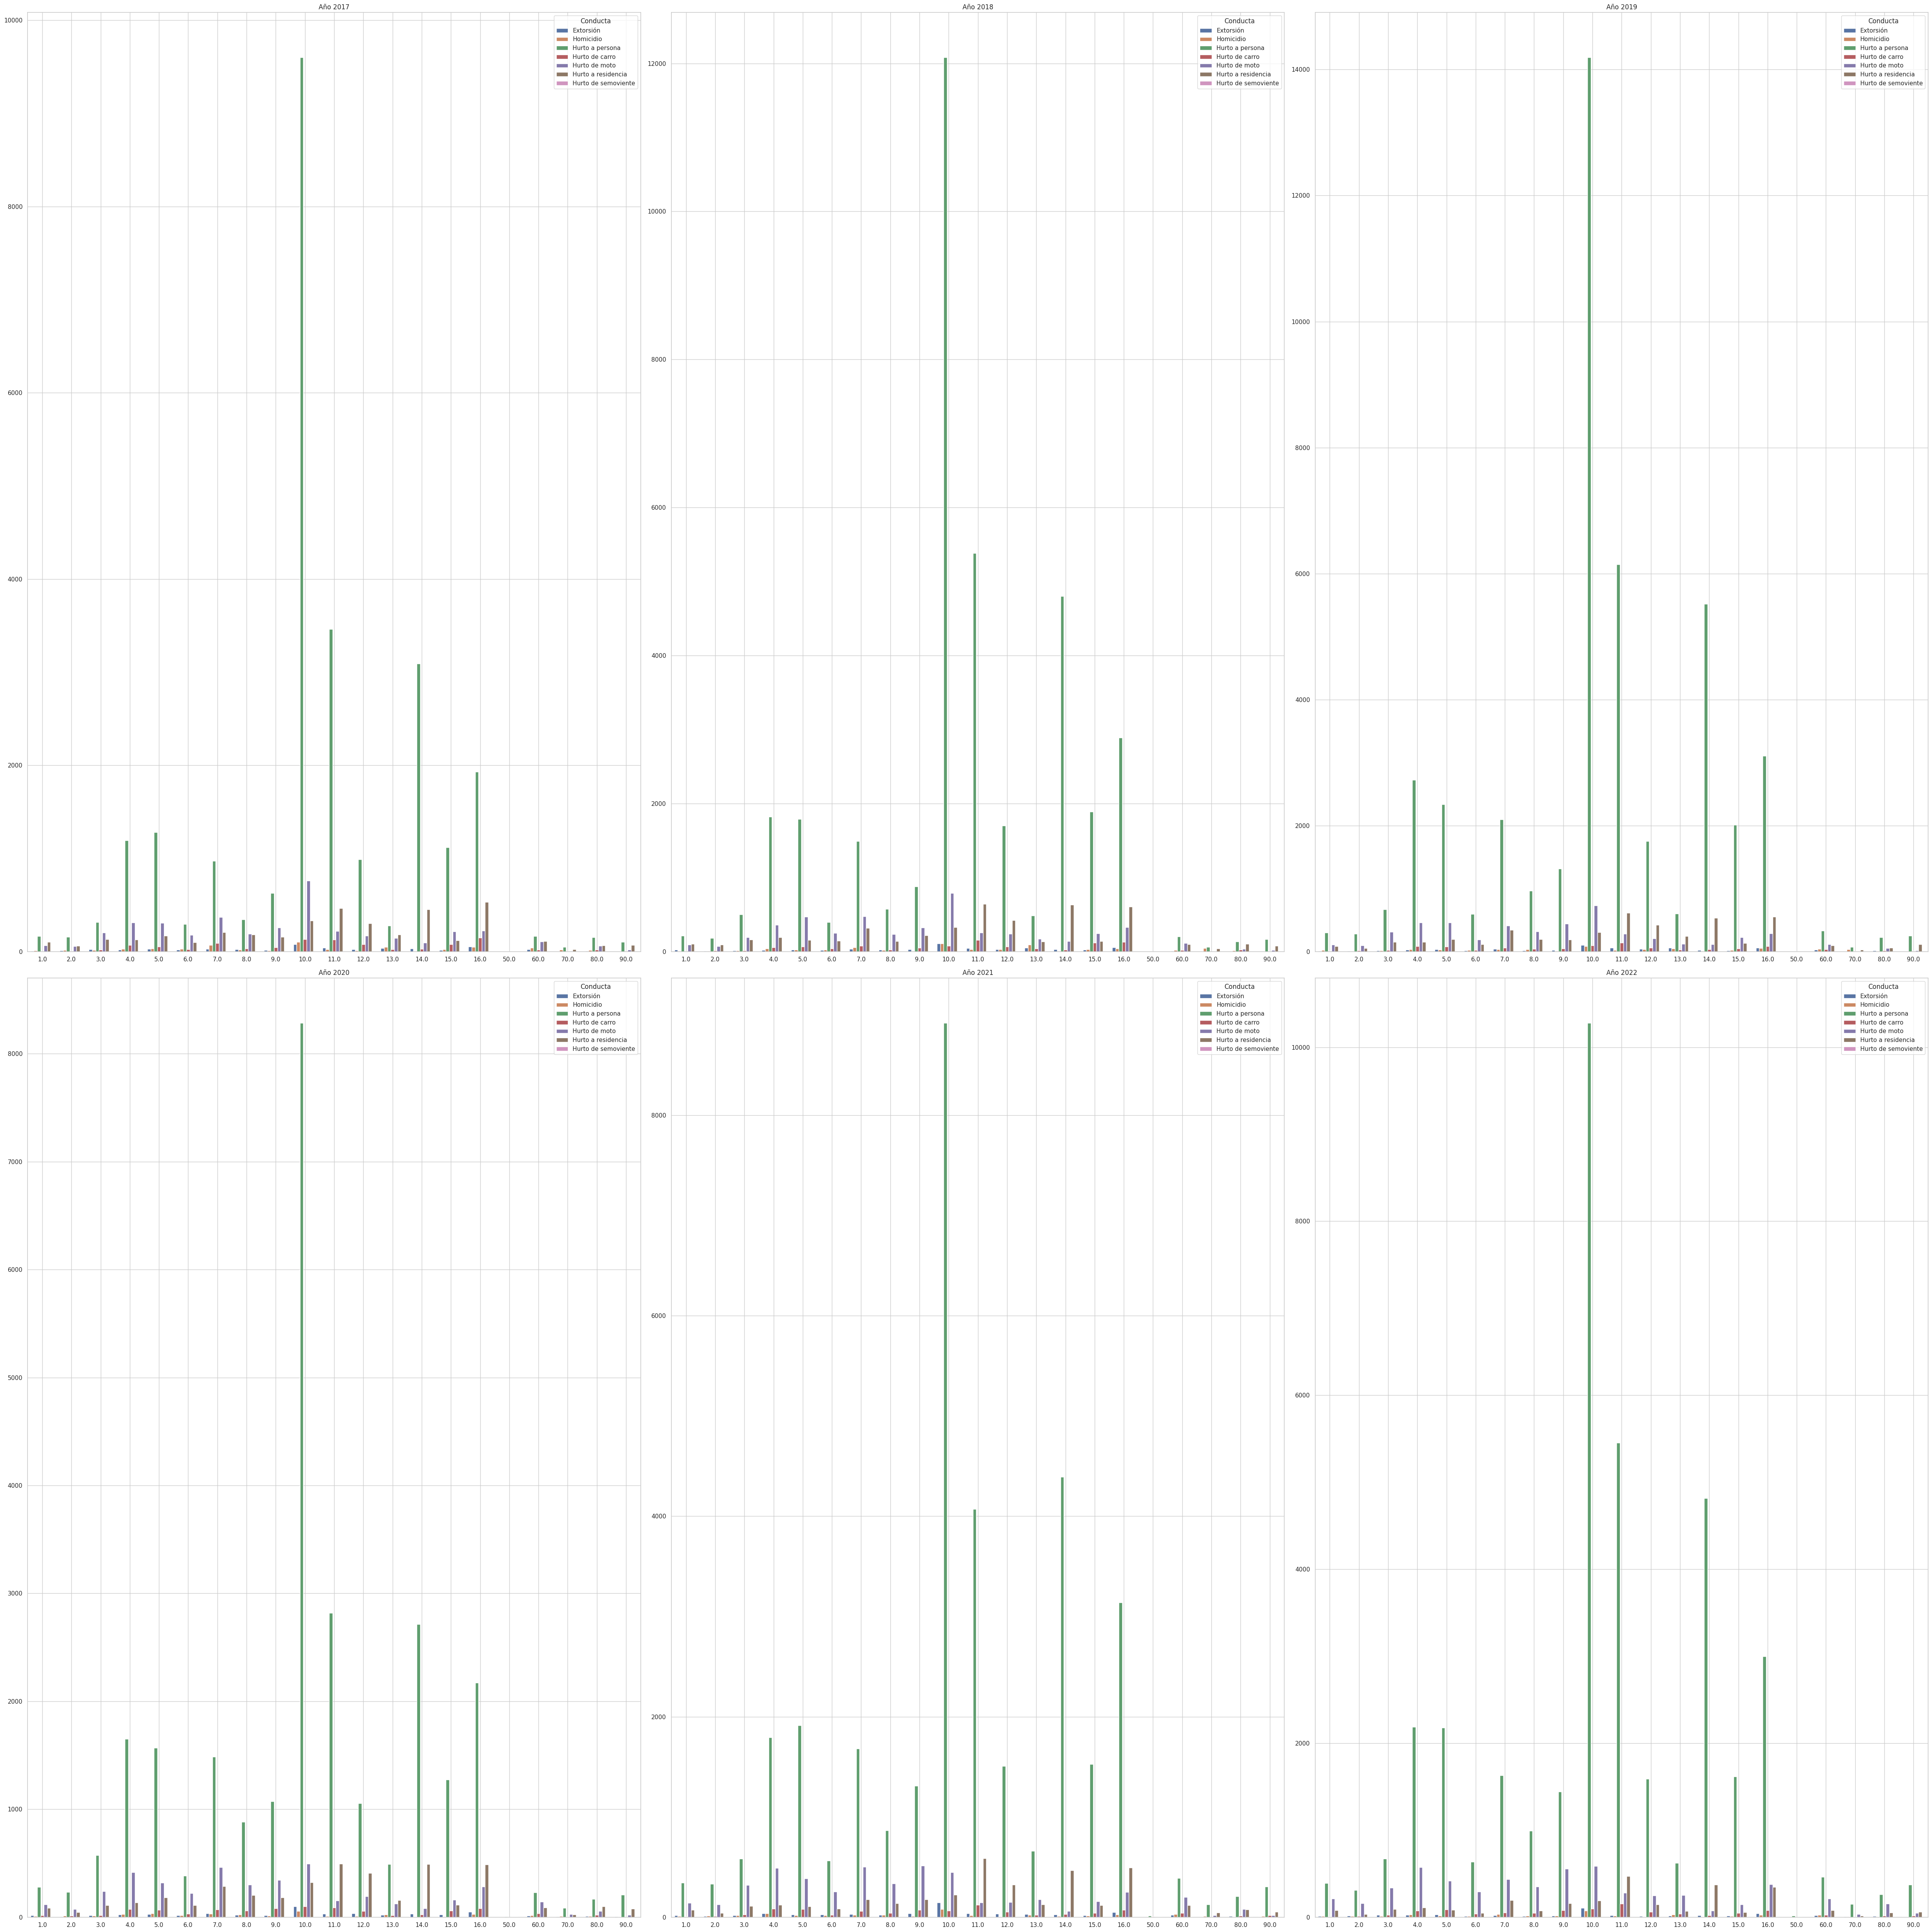

In [129]:
plt.figure(figsize = (50,50))


for n,i in enumerate(pd.unique(df_2017_2022['Fecha_hecho'])):
    plt.subplot(2,3, n + 1)
    data = df_2017_2022[(df_2017_2022.Fecha_hecho == i) & (df_2017_2022.Conducta.isin(aray_conductas))]
    sns.barplot(data = data, x = 'Codigo_comuna', y = 'Cantidad_casos' ,hue = 'Conducta')
    plt.title(f"Año {i}")
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis = "x")
    #plt.xticks(rotation=90)
    plt.tight_layout()
plt.savefig('Gráficos de Barras para Conductas (2017-2022).jpg', dpi = 300, transparent=True)
plt.show()

In [101]:
df_2017_2022[df_2017_2022['Codigo_comuna'] == 10.0]

,index,Fecha_hecho,Conducta,Codigo_comuna,Cantidad_casos
1,206,2017,Extorsión,10.0,77
21,226,2018,Extorsión,10.0,109
41,246,2019,Extorsión,10.0,103
62,267,2020,Extorsión,10.0,100
82,287,2021,Extorsión,10.0,148
102,307,2022,Extorsión,10.0,104
130,619,2017,Homicidio,10.0,103
151,640,2018,Homicidio,10.0,108
170,659,2019,Homicidio,10.0,87
191,680,2020,Homicidio,10.0,58
